# 🎬 IMDb Sentiment Analysis using NLP & Machine Learning
### Thulasi Baddipudi
### Tools: Python | NLTK | Scikit-learn | TF-IDF | Logistic Regression | Naive Bayes

## 📌 Problem Statement
Build a machine learning model to classify IMDb movie reviews as Positive or Negative using Natural Language Processing techniques.

## 📂 Dataset Description
This project uses the IMDb Movie Review Dataset.
- Real-world movie reviews
- Binary sentiment classification (Positive / Negative)
- 4,000 reviews sampled for this project

## 📑 Project Workflow
1. Data Cleaning
2. Feature Engineering (TF-IDF with n-grams)
3. Model Training (Logistic Regression & Naive Bayes)
4. Evaluation (Accuracy, Confusion Matrix, Cross-Validation)
5. Conclusion

## 📑 Project Structure
1. Problem Statement
2. Dataset Description
3. Data Cleaning
4. Feature Engineering
5. Model Training
6. Evaluation
7. Conclusion

In [ ]:
# Import required libraries for data handling, NLP preprocessing,
# feature extraction, model training, and evaluation
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

print("Libraries loaded successfully!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Libraries loaded successfully!


In [ ]:
# Download Required packages
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load IMDb movie review dataset
# This dataset contains real-world positive and negative movie reviews
# We sample 4000 reviews for manageable training and evaluation
import pandas as pd
from sklearn.datasets import load_files
import tarfile
import urllib.request
import os

# Download dataset
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filename = "aclImdb_v1.tar.gz"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

# Extract
if not os.path.exists("aclImdb"):
    tar = tarfile.open(filename, "r:gz")
    tar.extractall()
    tar.close()

# Load dataset
dataset = load_files("aclImdb/train", categories=['pos','neg'], encoding='utf-8')

df = pd.DataFrame({
    "review": dataset.data,
    "sentiment": dataset.target
})

df.head()

/tmp/ipython-input-680/1036428539.py:20: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


,review,sentiment
0,"Zero Day leads you to think, even re-think why...",1
1,Words can't describe how bad this movie is. I ...,0
2,Everyone plays their part pretty well in this ...,1
3,There are a lot of highly talented filmmakers/...,0
4,I've just had the evidence that confirmed my s...,0


In [ ]:
#-------------------------------------------------------------------------------------------------------

In [ ]:
#output validation
df['sentiment'] = df['sentiment'].map({0: "Negative", 1: "Positive"})
df.head()

,review,sentiment
0,"Zero Day leads you to think, even re-think why...",Positive
1,Words can't describe how bad this movie is. I ...,Negative
2,Everyone plays their part pretty well in this ...,Positive
3,There are a lot of highly talented filmmakers/...,Negative
4,I've just had the evidence that confirmed my s...,Negative


In [ ]:
#-----------------------------------------------------------------------------------------

In [ ]:
#counting
df = df.sample(4000, random_state=42)
df = df.reset_index(drop=True)

df['sentiment'].value_counts()

,count
sentiment,
Positive,2034
Negative,1966


In [ ]:
#----------------------------------------------------------------------------------------------

In [ ]:
# # ----------------------------
# TEXT PREPROCESSING
# ----------------------------
# Steps performed:
# 1. Convert text to lowercase
# 2. Remove HTML tags
# 3. Remove special characters and numbers
# 4. Remove English stopwords
# 5. Rejoin cleaned words
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['cleaned_review'] = df['review'].apply(clean_text)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,cleaned_review
0,What's not to like about this movie? Every yea...,Positive,like movie every year know going get one two y...
1,This is a dry and sterile feature filming on o...,Negative,dry sterile feature filming one interesting ev...
2,***THIS POST CONTAINS SPOILER(S)*** <br /><br ...,Negative,post contains spoiler big fan chuck norris act...
3,"Sorry everyone,,, I know this is supposed to b...",Negative,sorry everyone know supposed art film wow hand...
4,Life is really too short for movies like this....,Negative,life really short movies like knew good realiz...


In [ ]:
#------------------------------------------------------------------------------------------------

In [ ]:
# ----------------------------
# FEATURE ENGINEERING
# ----------------------------
# Convert text data into numerical format using TF-IDF
# max_features=5000 limits vocabulary size
# ngram_range=(1,2) captures unigrams and bigrams for better context
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [ ]:
#--------------------------------------------------------------------------------------------

In [ ]:
# Split dataset into training and testing sets
# 80% training, 20% testing
# random_state ensures reproducibility
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
#----------------------------------------------------------------------------------------------

In [ ]:
# ----------------------------
# MODEL 1: LOGISTIC REGRESSION
# ----------------------------
# Logistic Regression works well for high-dimensional sparse text data
# max_iter increased to ensure convergence
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8525


In [ ]:
#--------------------------------------------------------------------------------------------------

In [ ]:
# ----------------------------
# MODEL 2: MULTINOMIAL NAIVE BAYES
# ----------------------------
# Naive Bayes is commonly used for text classification
# Assumes word independence
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.85125


In [ ]:
#-------------------------------------------------------------------------------------------------------

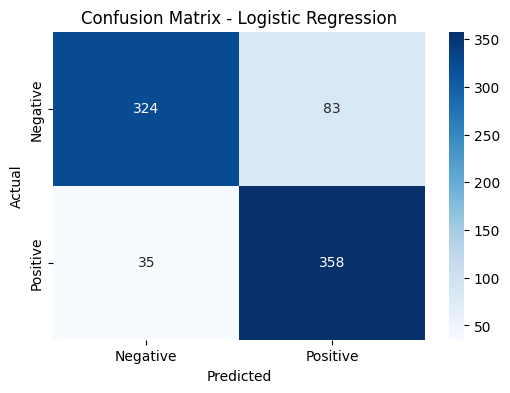

In [ ]:
## Visualize model performance using Confusion Matrix
# Helps understand false positives and false negatives
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
#-----------------------------------------------------------------------------------------------------------------

In [ ]:

# Perform 5-fold cross-validation
# Ensures model stability and checks for overfittingfrom sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross Validation Scores: [0.83125 0.8425  0.85125 0.8425  0.84875]
Average CV Score: 0.8432499999999999


In [ ]:
#Final Result
print("Final Model Performance:")
print("Logistic Regression Accuracy: 85.25%")
print("Naive Bayes Accuracy: 85.12%")
print("Average Cross-Validation Accuracy: 84.3%")

Final Model Performance:
Logistic Regression Accuracy: 85.25%
Naive Bayes Accuracy: 85.12%
Average Cross-Validation Accuracy: 84.3%


In [ ]:
#----------------------------------------------------------------------------------------------------

## 🔮 Future Improvements

- Hyperparameter tuning
- Support Vector Machine (SVM)
- Deep Learning (LSTM / BERT)
- Model Deployment using Streamlit

## ✅ Conclusion
This project demonstrates a complete NLP pipeline including preprocessing, feature engineering using TF-IDF, model comparison, and evaluation. The model achieved strong baseline performance (~85% accuracy) with stable cross-validation results (~84%), indicating good generalization.